# Artificial Intelligence for Cybersecurity

## Costants

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH = "./UNSW/"
TRAIN_FILE = PATH + "UNSW_NB15_training-set.csv"
TEST_FILE = PATH + "UNSW_NB15_testing-set.csv"
FEATURE_NAMES_FILE = PATH + "NUSW-NB15_features.csv"

train_df = pd.read_csv(TRAIN_FILE, sep=",", index_col=0)
test_df = pd.read_csv(TEST_FILE, sep=",", index_col=0)

In [2]:
header_names = train_df.columns.values.tolist()
col_names = np.array(header_names)

nominal_idx = [1, 2, 3] #proto; service; state
binary_idx = [36, 41] #is_ftp_login; is_sm_ips_ports;
numeric_idx = list(set(range(42)).difference(nominal_idx).difference(binary_idx)) #don't consider attack_cat and label


nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

# Analyzing training set

In [3]:
train_df.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [4]:
duplicates = train_df.duplicated().sum()
if(duplicates > 0):
    print("Duplicates row number " + str(duplicates) + " on " + str(len(train_df.index)))
    train_df.drop_duplicates(inplace = True)
    print("New size: "+ str(len(train_df.index)))

Duplicates row number 67601 on 175341
New size: 107740


In [5]:
train_df.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [6]:
print(train_df.groupby("label").label.count())

label
0    51890
1    55850
Name: label, dtype: int64


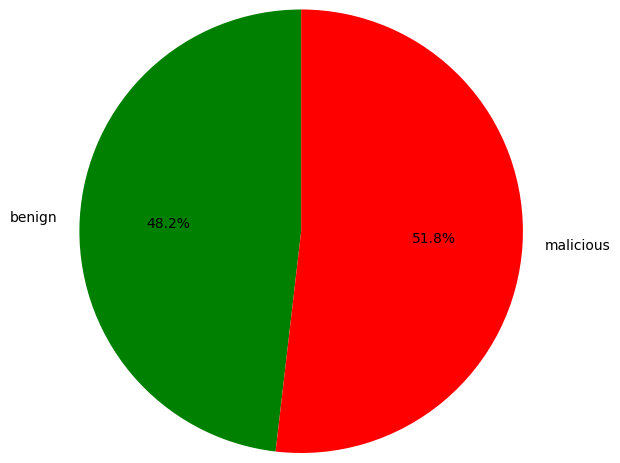

In [7]:
plt.pie(train_df.groupby("label").label.count(), labels = ["benign", "malicious"], startangle=90, radius = 1.5, autopct = '%1.1f%%', colors=["g", "r"])
plt.show()

In [8]:
train_df.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,107740.000000,107740.000000,107740.000000,1.077400e+05,1.077400e+05,1.077400e+05,107740.000000,107740.000000,1.077400e+05,1.077400e+05,...,107740.000000,107740.000000,107740.000000,107740.000000,107740.000000,107740.000000,107740.000000,107740.000000,107740.000000,107740.000000
mean,1.355982,30.190459,30.059087,1.382541e+04,2.373248e+04,3.869093e+04,143.052246,121.600046,4.968117e+07,1.089236e+06,...,1.984017,1.441934,4.025292,0.017310,0.017310,0.181984,3.905532,4.784982,0.005058,0.518378
std,5.521568,173.417880,136.545939,2.226347e+05,1.786208e+05,1.166318e+05,107.776171,116.015831,2.114064e+08,3.013781e+06,...,3.347937,2.096007,6.156138,0.132823,0.132823,0.578794,4.987334,6.197668,0.070943,0.499664
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.001701,4.000000,2.000000,5.015000e+02,1.780000e+02,2.623382e+01,31.000000,29.000000,9.317051e+03,2.113083e+03,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,0.305082,10.000000,8.000000,9.520000e+02,3.540000e+02,8.727963e+01,62.000000,29.000000,8.762879e+04,7.912985e+03,...,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,1.000000
75%,0.971105,22.000000,18.000000,2.542000e+03,3.080000e+03,4.020464e+03,254.000000,252.000000,1.115275e+06,5.462244e+05,...,2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,4.000000,6.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


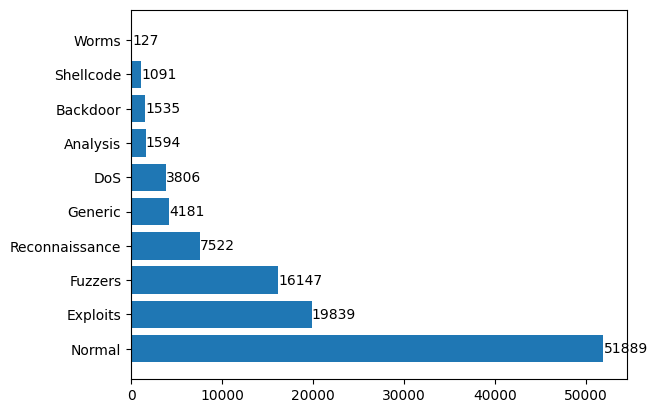

In [64]:
train_attack_types = train_df["attack_cat"].value_counts()
fig, ax = plt.subplots()

bars = ax.barh(train_attack_types.index, train_attack_types.values)
text = ax.bar_label(bars)

In [10]:
train_df[binary_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_ftp_login,107740.0,0.017310,0.132823,0.0,0.0,0.0,0.0,4.0
is_sm_ips_ports,107740.0,0.005058,0.070943,0.0,0.0,0.0,0.0,1.0


The column `is_ftp_login` is a binary feature. From `feature.txt`: 
>*if the ftp session is accessed by user and password then 1 else 0.*

Let's analyze more in depth.

In [11]:
train_df.groupby(["is_ftp_login"]).size()

is_ftp_login
0    105894
1      1837
2         4
4         5
dtype: int64

There are 9 rows with `is_ftp_login = 2`. We will fix this discrepancy deleting the rows, as they are only 9 rows on 107740.

In [12]:
train_df.drop(train_df[train_df.is_ftp_login > 1].index, inplace=True)
train_df.groupby(["is_ftp_login"]).size()

is_ftp_login
0    105894
1      1837
dtype: int64

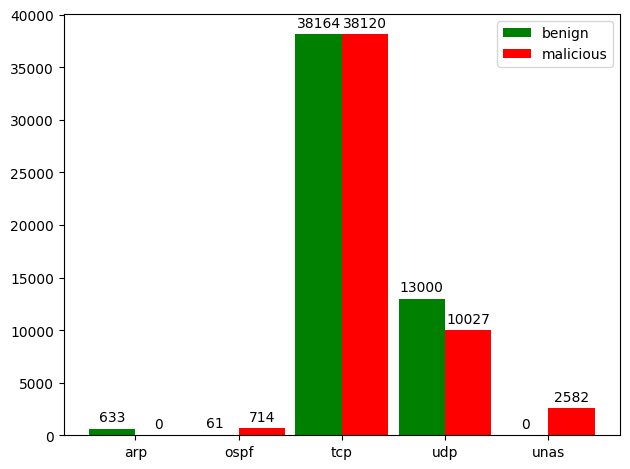

In [69]:
sorted_df = pd.DataFrame(train_df.groupby(["proto", "label"], as_index=False).size().sort_values("size", ascending=False))
labels = ['arp', 'ospf', 'tcp', 'udp', 'unas']

benign = sorted_df[sorted_df.label == 0]
benign = benign[benign["proto"].isin(labels)]
df1 = pd.DataFrame([['unas', 0, 0]], columns=['proto', 'label', 'size'])
benign = pd.concat([benign, df1], axis=0)
benign = benign.sort_values("proto")


malicious = sorted_df[sorted_df.label == 1]
malicious = malicious[malicious["proto"].isin(labels)]
df1 = pd.DataFrame([['arp', 0, 0]], columns=['proto', 'label', 'size'])
malicious = pd.concat([malicious, df1], axis=0)
malicious = malicious.sort_values("proto")


x = np.arange(len(labels))
width = 0.45

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, benign["size"], width, label='benign', color='g')
rects2 = ax.bar(x + width/2, malicious["size"], width, label='malicious', color='r')

ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

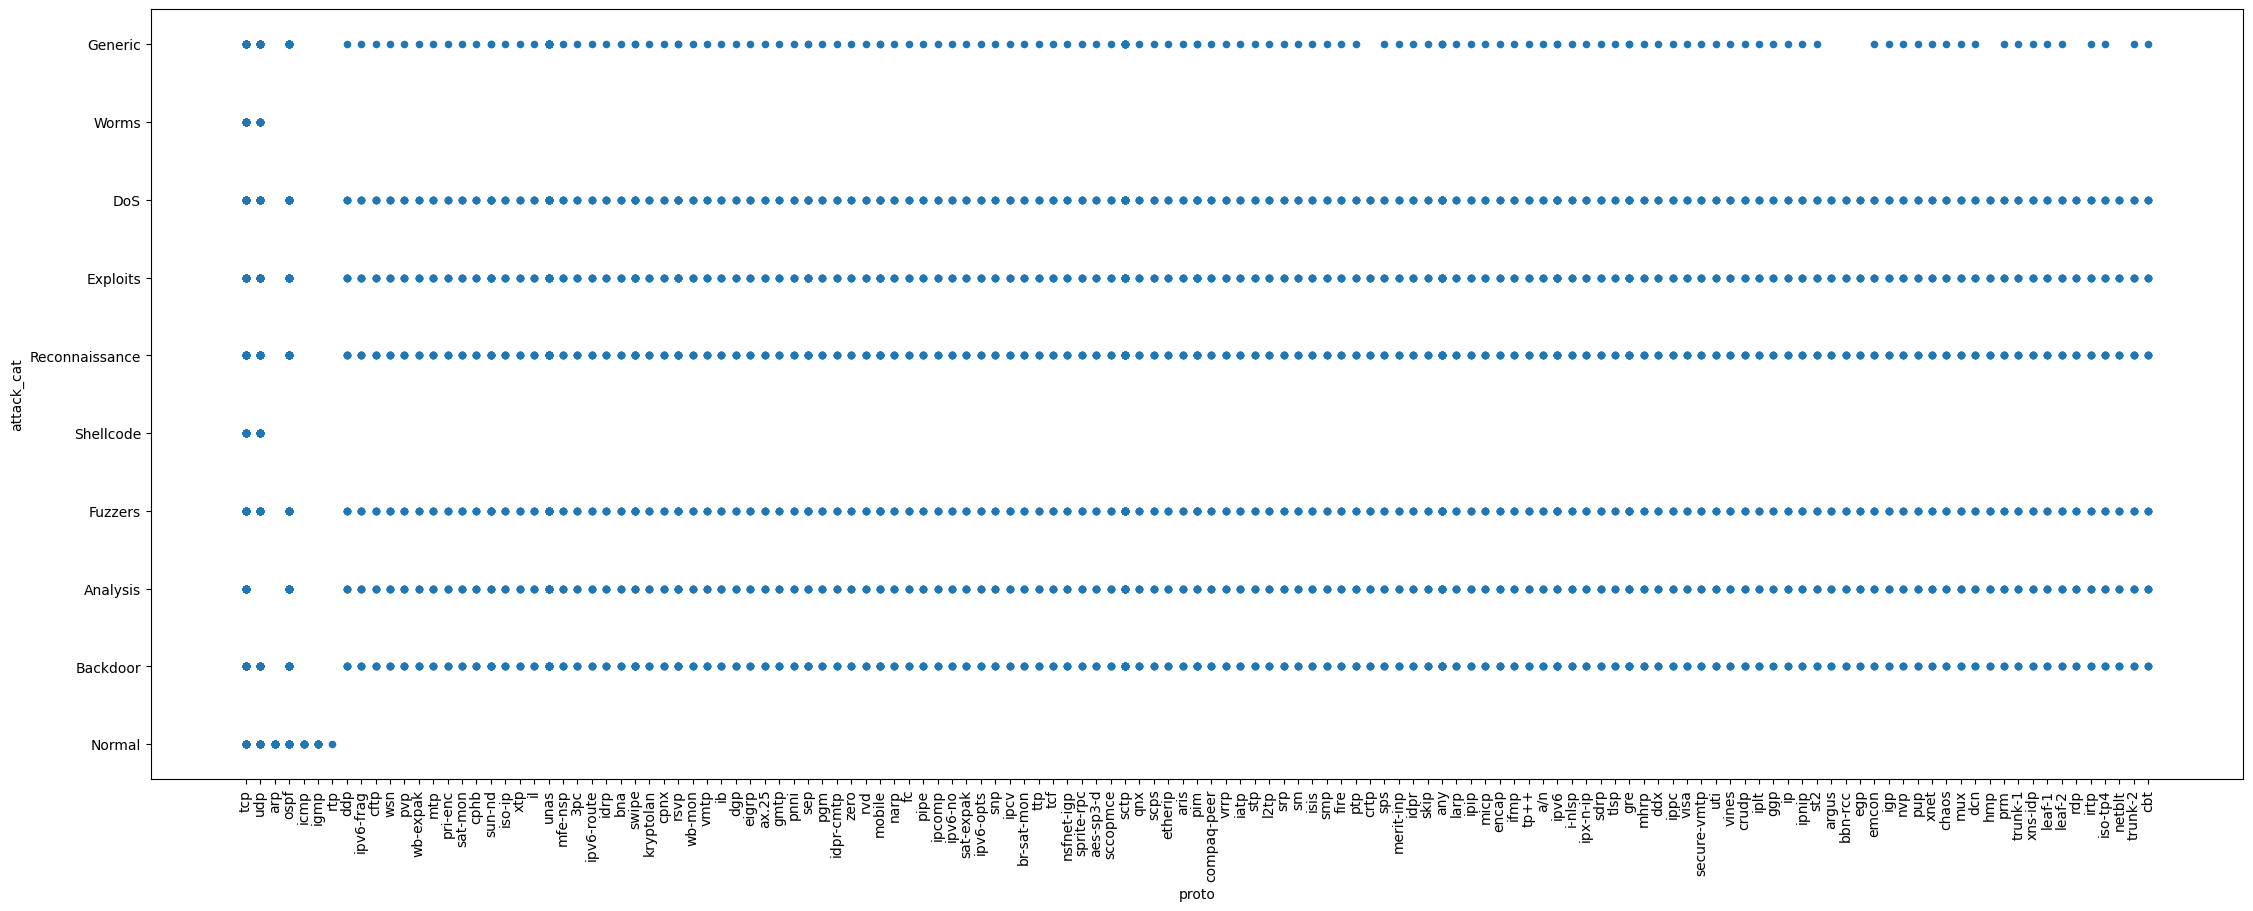

In [14]:
train_df.plot(x = 'proto', y = 'attack_cat', kind = 'scatter', figsize=(27,10))
plt.xticks(rotation=90)
plt.show()

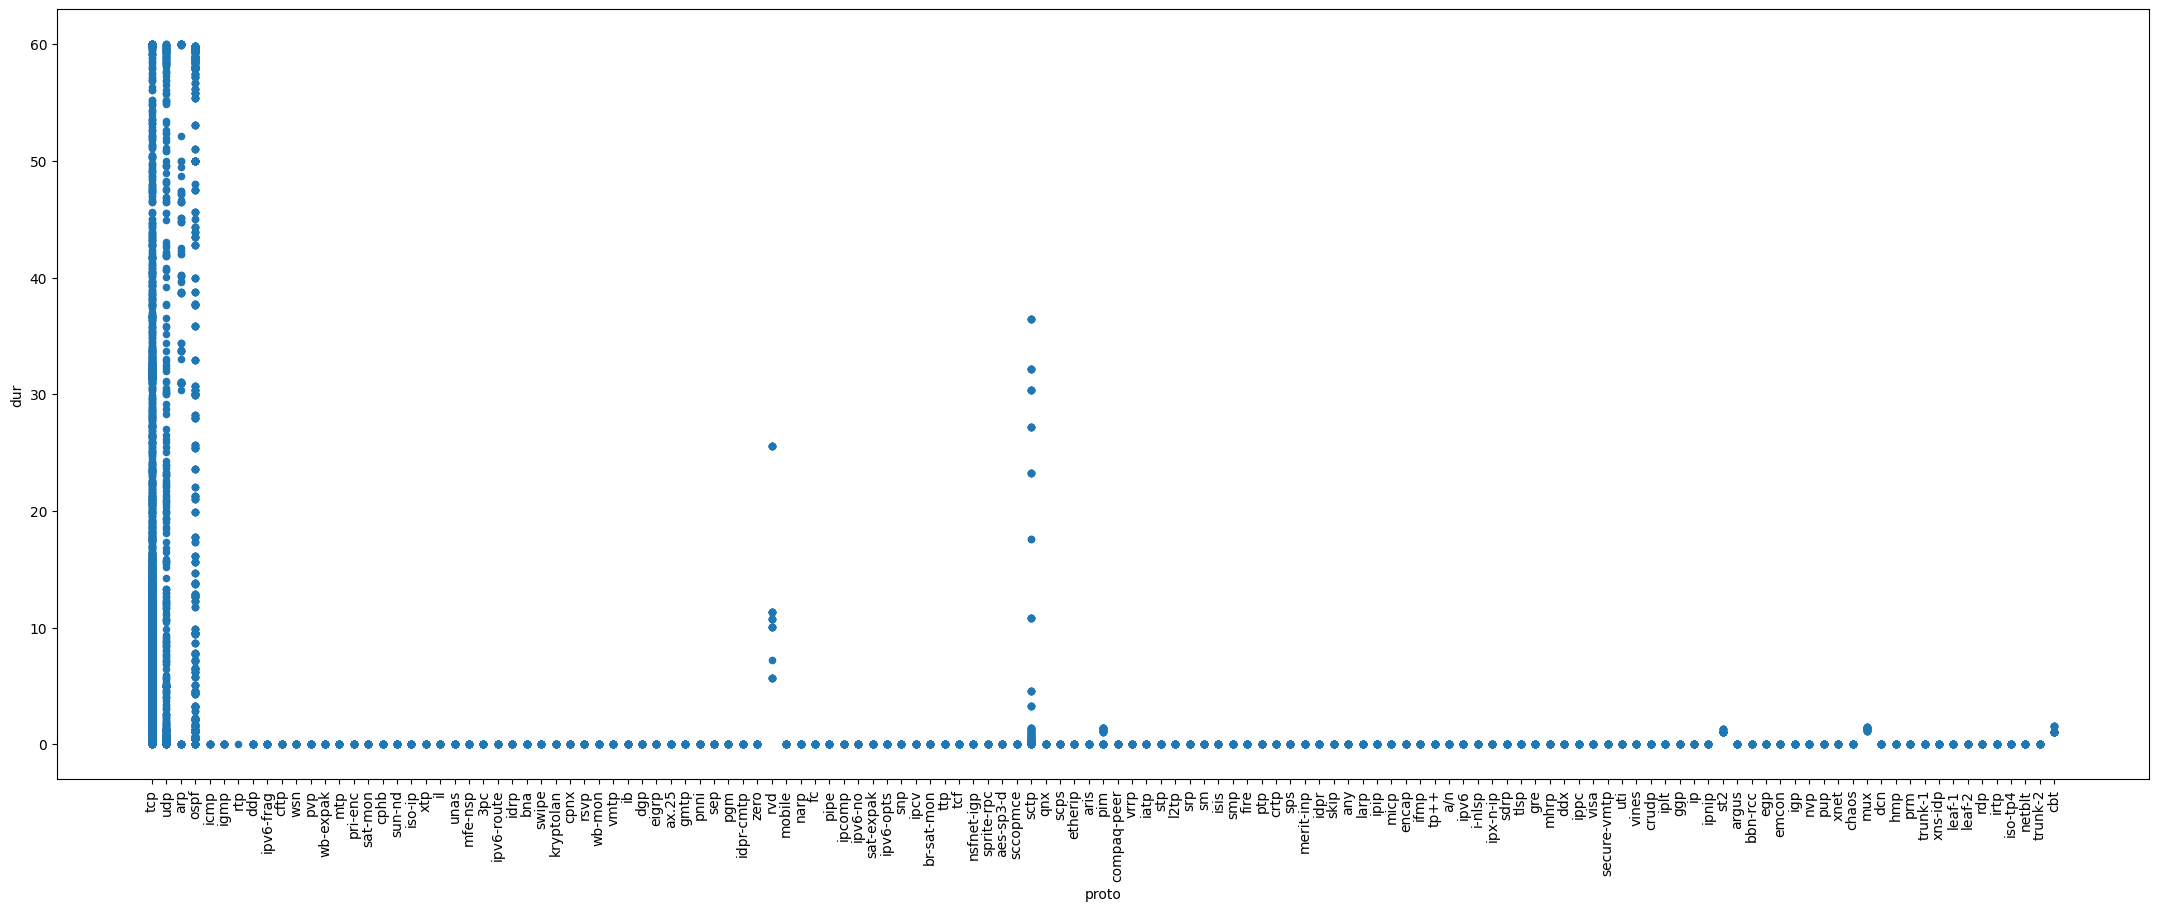

In [15]:
train_df.plot(x = 'proto', y = 'dur', kind = 'scatter', figsize=(27,10))
plt.xticks(rotation=90)
plt.show()

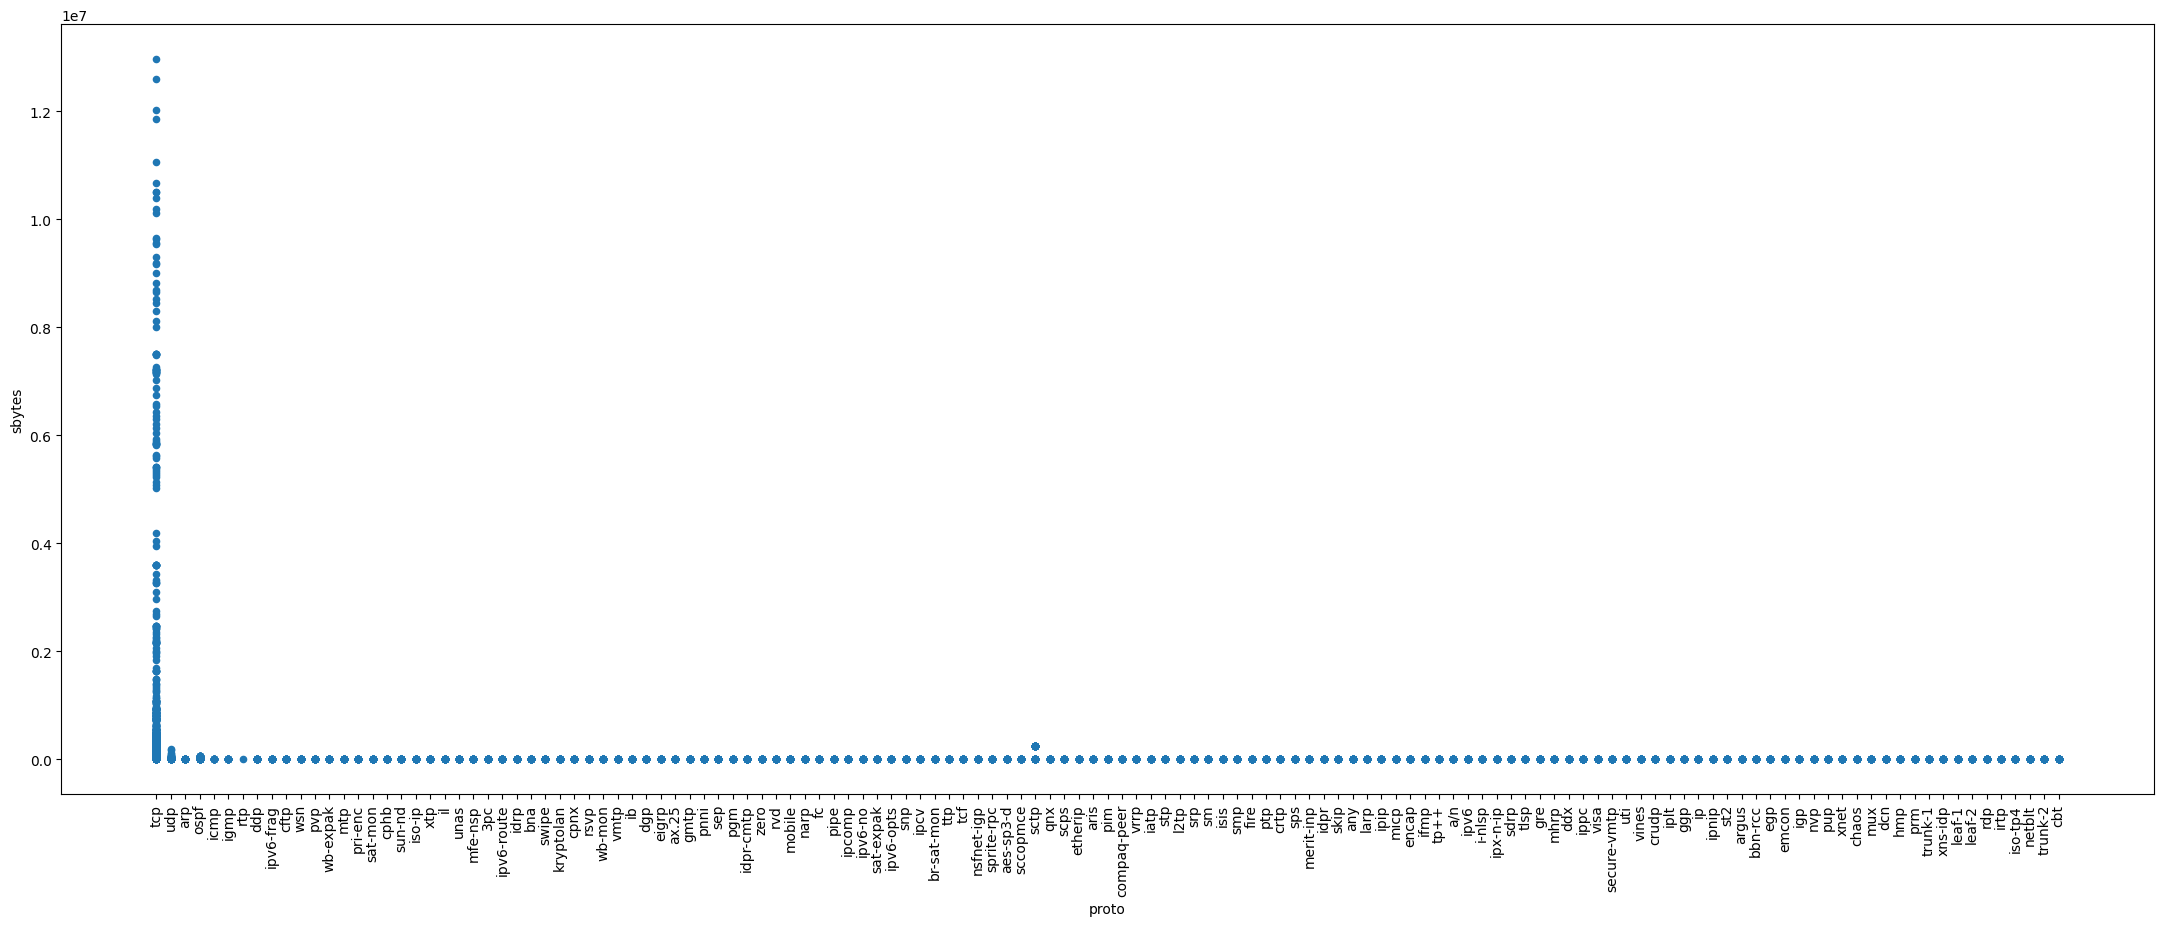

In [16]:
train_df.plot(x = 'proto', y = 'sbytes', kind = 'scatter', figsize=(27,10))
plt.xticks(rotation=90)
plt.show()

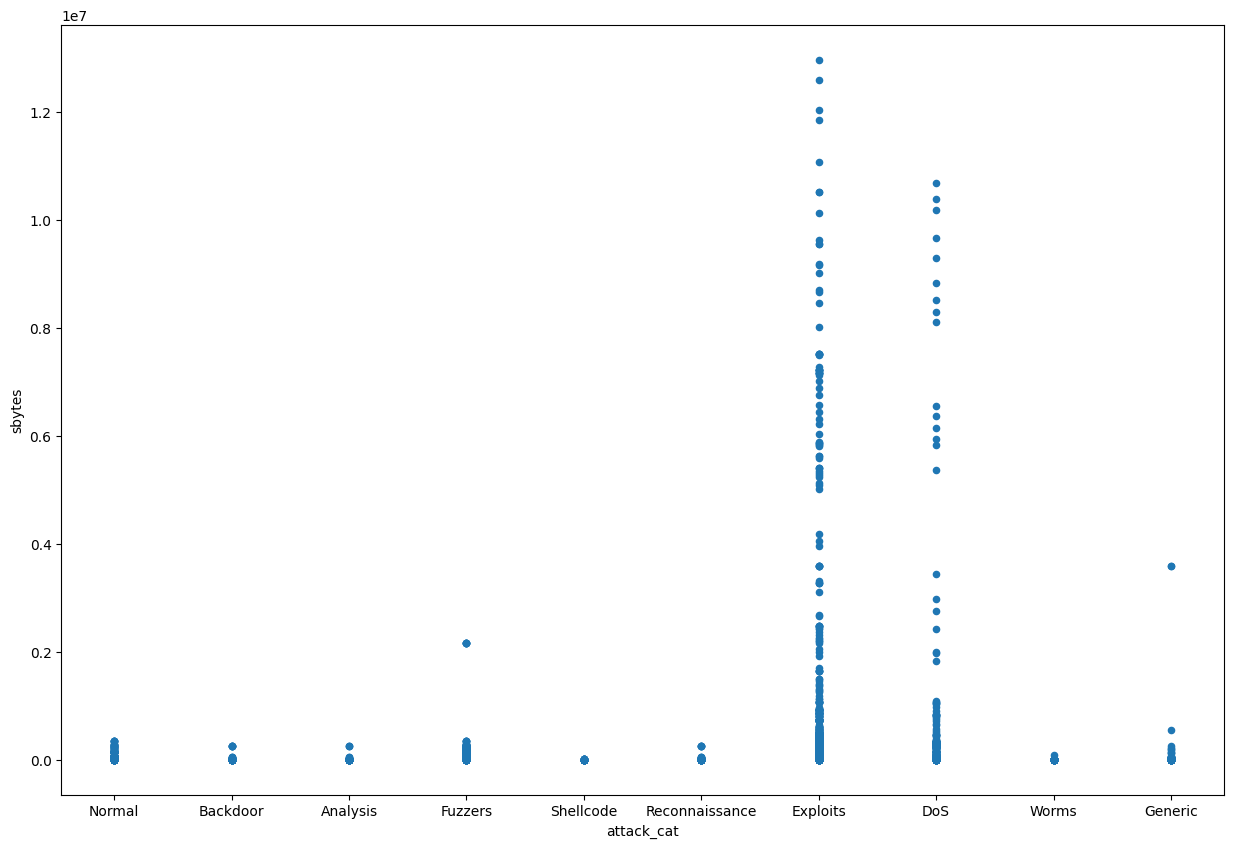

In [17]:
train_df.plot(x = 'attack_cat', y = 'sbytes', kind = 'scatter', figsize=(15,10))
plt.show()

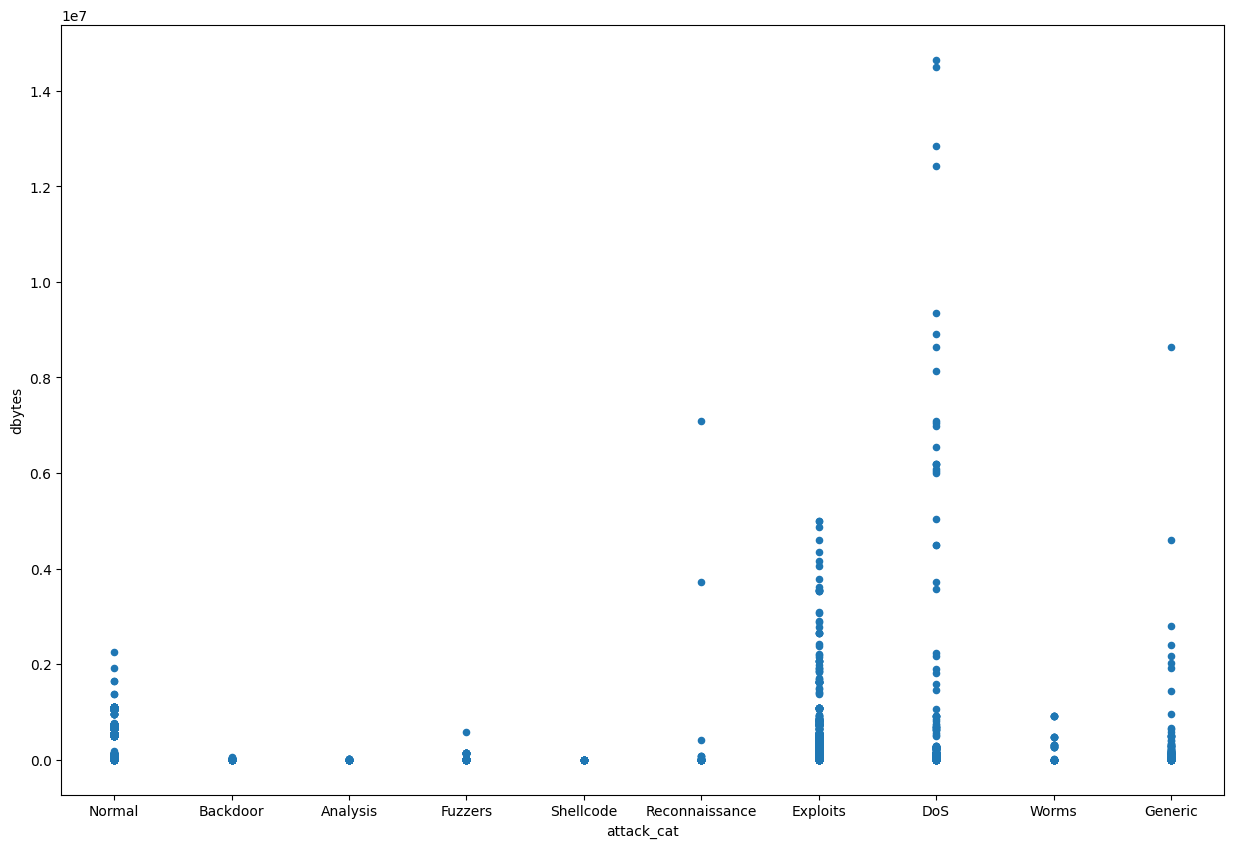

In [18]:
train_df.plot(x = 'attack_cat', y = 'dbytes', kind = 'scatter', figsize=(15,10))
plt.show()

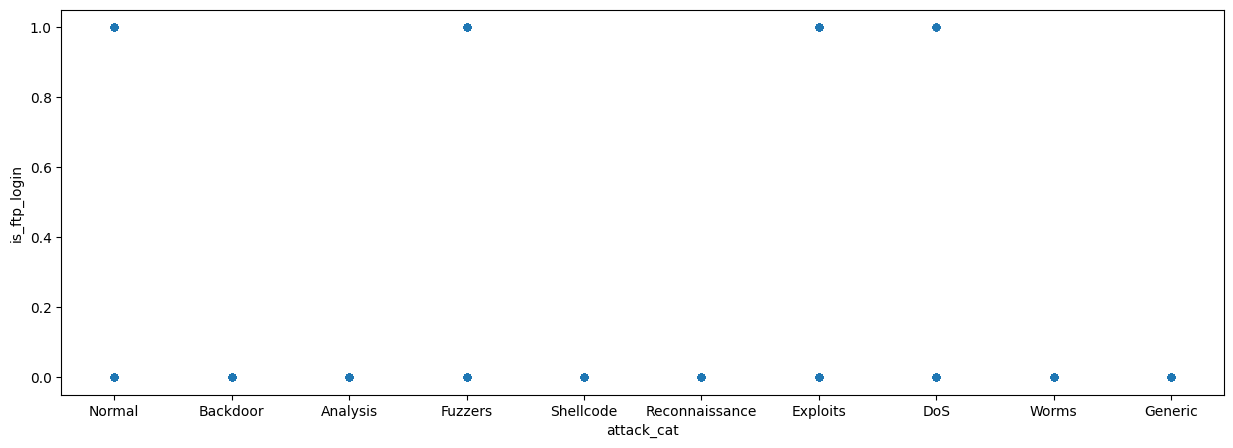

In [19]:
train_df.plot(x = 'attack_cat', y = 'is_ftp_login', kind = 'scatter', figsize=(15,5))
plt.show()

`is_sms_ips_ports`: 
>*If source and destination IP addresses equal and port numbers equal, this variable takes value 1 else 0*

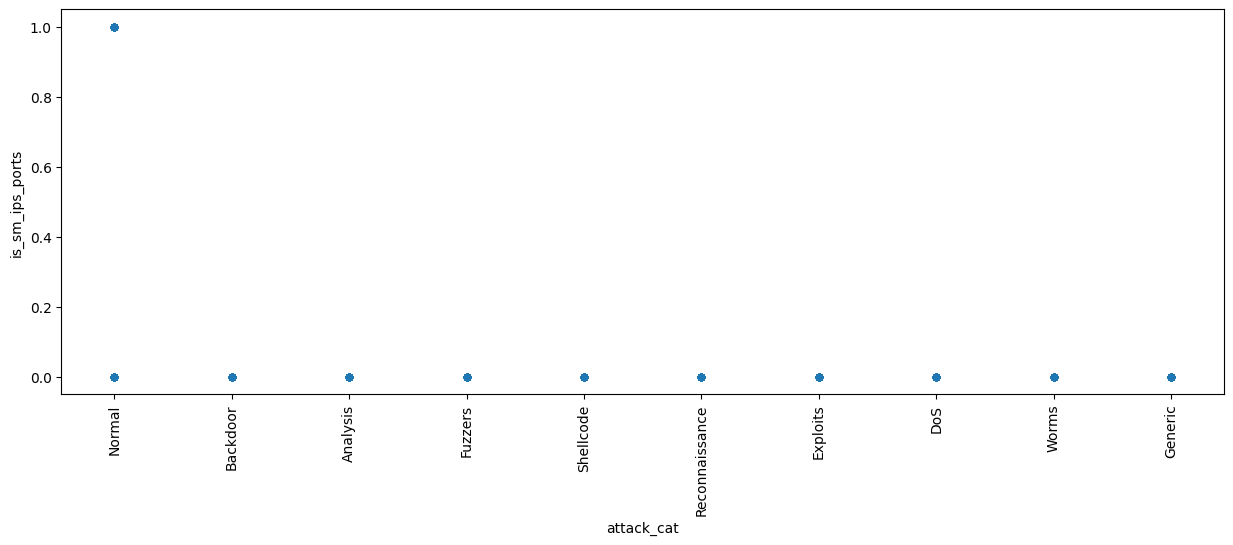

In [20]:
train_df.plot(x = 'attack_cat', y = 'is_sm_ips_ports', kind = 'scatter', figsize=(15,5))
plt.xticks(rotation=90)
plt.show()

# Classification

In [21]:
train_Y = train_df["attack_cat"]
train_Y_bin = train_df["label"]
train_x = train_df.drop(["attack_cat", "label", "proto", "service", "state"], axis=1)

In [41]:
def print_multi(results):
    metrics = ['Precision', 'Recall', 'F1-score']
    for metric in metrics:
        print(f'{metric:15}', np.round(results["test_"+metric].mean(),3), [np.round(elem,3) for elem in results["test_"+metric]])

In [46]:
def print_bin(results):
    metrics = ['Accuracy', 'Precision_benign', 'Recall_benign', 'Precision_malicious', 'Recall_malicious', 'F1-score']
    for metric in metrics:
        print(f'{metric:20}', np.round(results["test_"+metric].mean(),3), [np.round(elem,3) for elem in results["test_"+metric]])

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, make_scorer, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

lr = LogisticRegression(n_jobs=-1, max_iter=1000)
svc = LinearSVC()
tree = DecisionTreeClassifier()

classifiers = [(lr, "Logistic Regression"), (svc, "SVC"), (tree, "Decision Tree")]

In [25]:
test_Y = test_df["attack_cat"]
test_Y_bin = test_df["label"]
test_x = test_df.drop(["attack_cat", "label", "proto", "service", "state"], axis=1)

## Multilabel

In [39]:
for cls, name in classifiers: 
    pipe = Pipeline([("MinMaxScaler", MinMaxScaler()), (name, cls)])
    pipe.fit(train_x, train_Y)
    predicted = pipe.predict(test_x)

    print(name)
    print("Precision: %f" % precision_score(test_Y, predicted, average="weighted", zero_division=0))
    print("Recall: %f" % recall_score(test_Y, predicted, average="weighted"))
    print("F1-Score: %f" % f1_score(test_Y, predicted, average="weighted"))
    print()

Logistic Regression
Precision: 0.752339
Recall: 0.573702
F1-Score: 0.612246

SVC
Precision: 0.730861
Recall: 0.592929
F1-Score: 0.615809

Decision Tree
Precision: 0.820839
Recall: 0.719793
F1-Score: 0.757486



## Binary

Logistic Regression
Precision: 0.730480
Accuracy: 0.784118
Recall: 0.963359
F1-Score: 0.830911


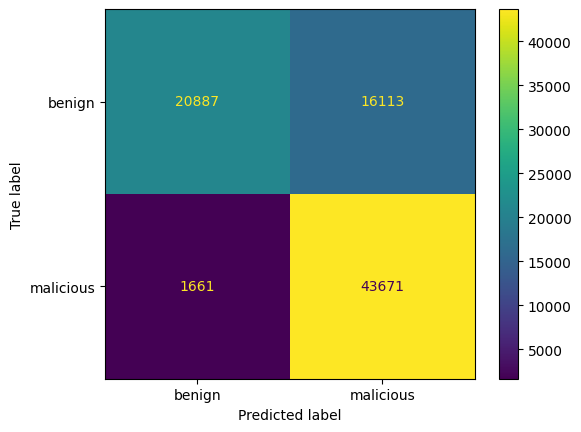


SVC
Precision: 0.731623
Accuracy: 0.789414
Recall: 0.975293
F1-Score: 0.836066


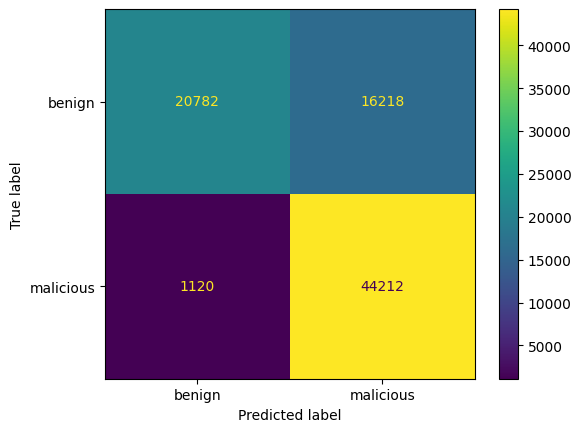


Decision Tree
Precision: 0.826843
Accuracy: 0.866516
Recall: 0.958241
F1-Score: 0.887706


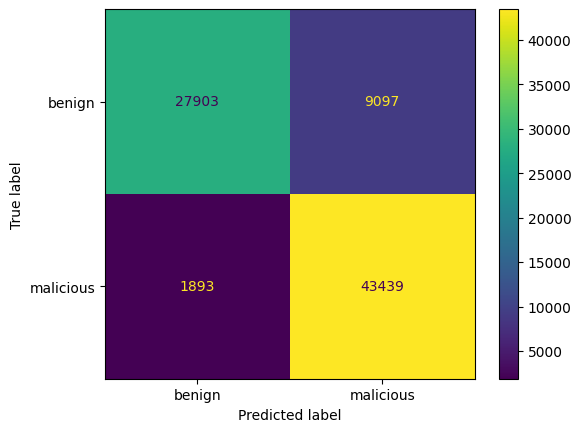

In [73]:
for cls, name in classifiers: 
    pipe = Pipeline([("MinMaxScaler", MinMaxScaler()), (name, cls)])
    pipe.fit(train_x, train_Y_bin)
    predicted_bin = pipe.predict(test_x)

    print(name)
    print("Precision: %f" % precision_score(test_Y_bin, predicted_bin, average="binary"))
    print("Accuracy: %f" % accuracy_score(test_Y_bin, predicted_bin))
    print("Recall: %f" % recall_score(test_Y_bin, predicted_bin, average="binary"))
    print("F1-Score: %f" % f1_score(test_Y_bin, predicted_bin, average="binary"))
    ConfusionMatrixDisplay.from_predictions(test_Y_bin, predicted_bin, display_labels = ['benign','malicious'])
    plt.show()
    print()

# Classification with SKF

## Multilabel

In [40]:
skfold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
result_multi = []

for cls, name in classifiers:
    pipe = Pipeline([("MinMaxScaler", MinMaxScaler()), (name, cls)])
    scores=cross_validate(pipe,
                         train_x,
                         train_Y,
                         scoring = {'Precision': make_scorer(precision_score, average = 'weighted', zero_division=0),
                                    'Recall': make_scorer(recall_score, average = 'weighted'),
                                    'F1-score': make_scorer(f1_score, average = 'weighted')},
                         return_estimator = False,
                         cv = skfold,
                         n_jobs = -1)
    result_multi.append((name, scores))

In [42]:
for r in result_multi:
    print(r[0])
    print_multi(r[1])
    print("\n")

Logistic Regression
Precision       0.759 [0.767, 0.749, 0.771, 0.794, 0.758, 0.743, 0.758, 0.743, 0.757, 0.749]
Recall          0.729 [0.728, 0.731, 0.732, 0.736, 0.733, 0.728, 0.726, 0.731, 0.729, 0.721]
F1-score        0.72 [0.718, 0.721, 0.722, 0.726, 0.723, 0.719, 0.717, 0.721, 0.72, 0.712]


SVC
Precision       0.746 [0.758, 0.767, 0.743, 0.752, 0.73, 0.729, 0.746, 0.742, 0.743, 0.755]
Recall          0.722 [0.724, 0.725, 0.724, 0.729, 0.724, 0.72, 0.718, 0.72, 0.723, 0.713]
F1-score        0.71 [0.712, 0.713, 0.712, 0.715, 0.712, 0.708, 0.707, 0.707, 0.71, 0.702]


Decision Tree
Precision       0.81 [0.811, 0.807, 0.815, 0.811, 0.814, 0.813, 0.81, 0.807, 0.809, 0.806]
Recall          0.782 [0.782, 0.784, 0.786, 0.786, 0.785, 0.784, 0.779, 0.777, 0.778, 0.777]
F1-score        0.795 [0.795, 0.794, 0.8, 0.797, 0.798, 0.797, 0.793, 0.791, 0.792, 0.79]




## Binary

In [48]:
skfold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
result_bin = []

for cls, name in classifiers:
    pipe = Pipeline([("MinMaxScaler", MinMaxScaler()), (name, cls)])
    scores=cross_validate(pipe,
                         train_x,
                         train_Y_bin,
                         scoring = {'Precision_benign': make_scorer(precision_score,pos_label = 1),                         
                                    'Precision_malicious': make_scorer(precision_score,pos_label = 0),
                                    'Recall_benign': make_scorer(recall_score,pos_label = 1),
                                    'Recall_malicious': make_scorer(recall_score,pos_label = 0),
                                    'F1-score': make_scorer(f1_score,pos_label = 0),
                                    'Accuracy': make_scorer(accuracy_score)},
                         return_estimator = False,
                         cv = skfold,
                         n_jobs = -1)
    result_bin.append((name, scores))

In [53]:
for r in result_bin:
    print(r[0])
    print_bin(r[1])
    print("\n")

Logistic Regression
Accuracy             0.892 [0.895, 0.894, 0.892, 0.894, 0.894, 0.889, 0.887, 0.893, 0.891, 0.889]
Precision_benign     0.841 [0.843, 0.844, 0.839, 0.846, 0.842, 0.836, 0.835, 0.844, 0.84, 0.837]
Recall_benign        0.976 [0.98, 0.975, 0.978, 0.974, 0.979, 0.977, 0.976, 0.973, 0.975, 0.976]
Precision_malicious  0.969 [0.974, 0.968, 0.971, 0.967, 0.972, 0.97, 0.969, 0.965, 0.968, 0.968]
Recall_malicious     0.801 [0.804, 0.807, 0.798, 0.809, 0.802, 0.794, 0.792, 0.807, 0.8, 0.796]
F1-score             0.877 [0.881, 0.88, 0.876, 0.881, 0.879, 0.873, 0.872, 0.879, 0.876, 0.874]


SVC
Accuracy             0.894 [0.897, 0.897, 0.893, 0.897, 0.897, 0.892, 0.891, 0.895, 0.893, 0.892]
Precision_benign     0.84 [0.843, 0.844, 0.838, 0.845, 0.842, 0.836, 0.835, 0.843, 0.839, 0.837]
Recall_benign        0.983 [0.985, 0.984, 0.985, 0.98, 0.985, 0.985, 0.982, 0.981, 0.982, 0.984]
Precision_malicious  0.978 [0.98, 0.979, 0.98, 0.974, 0.98, 0.98, 0.976, 0.975, 0.976, 0.979]
Recall

# Classification with Oversampling

In [49]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=10, n_jobs=-1)

train_x_os, train_Y_os = sm.fit_resample(train_x, train_Y)

<AxesSubplot:>

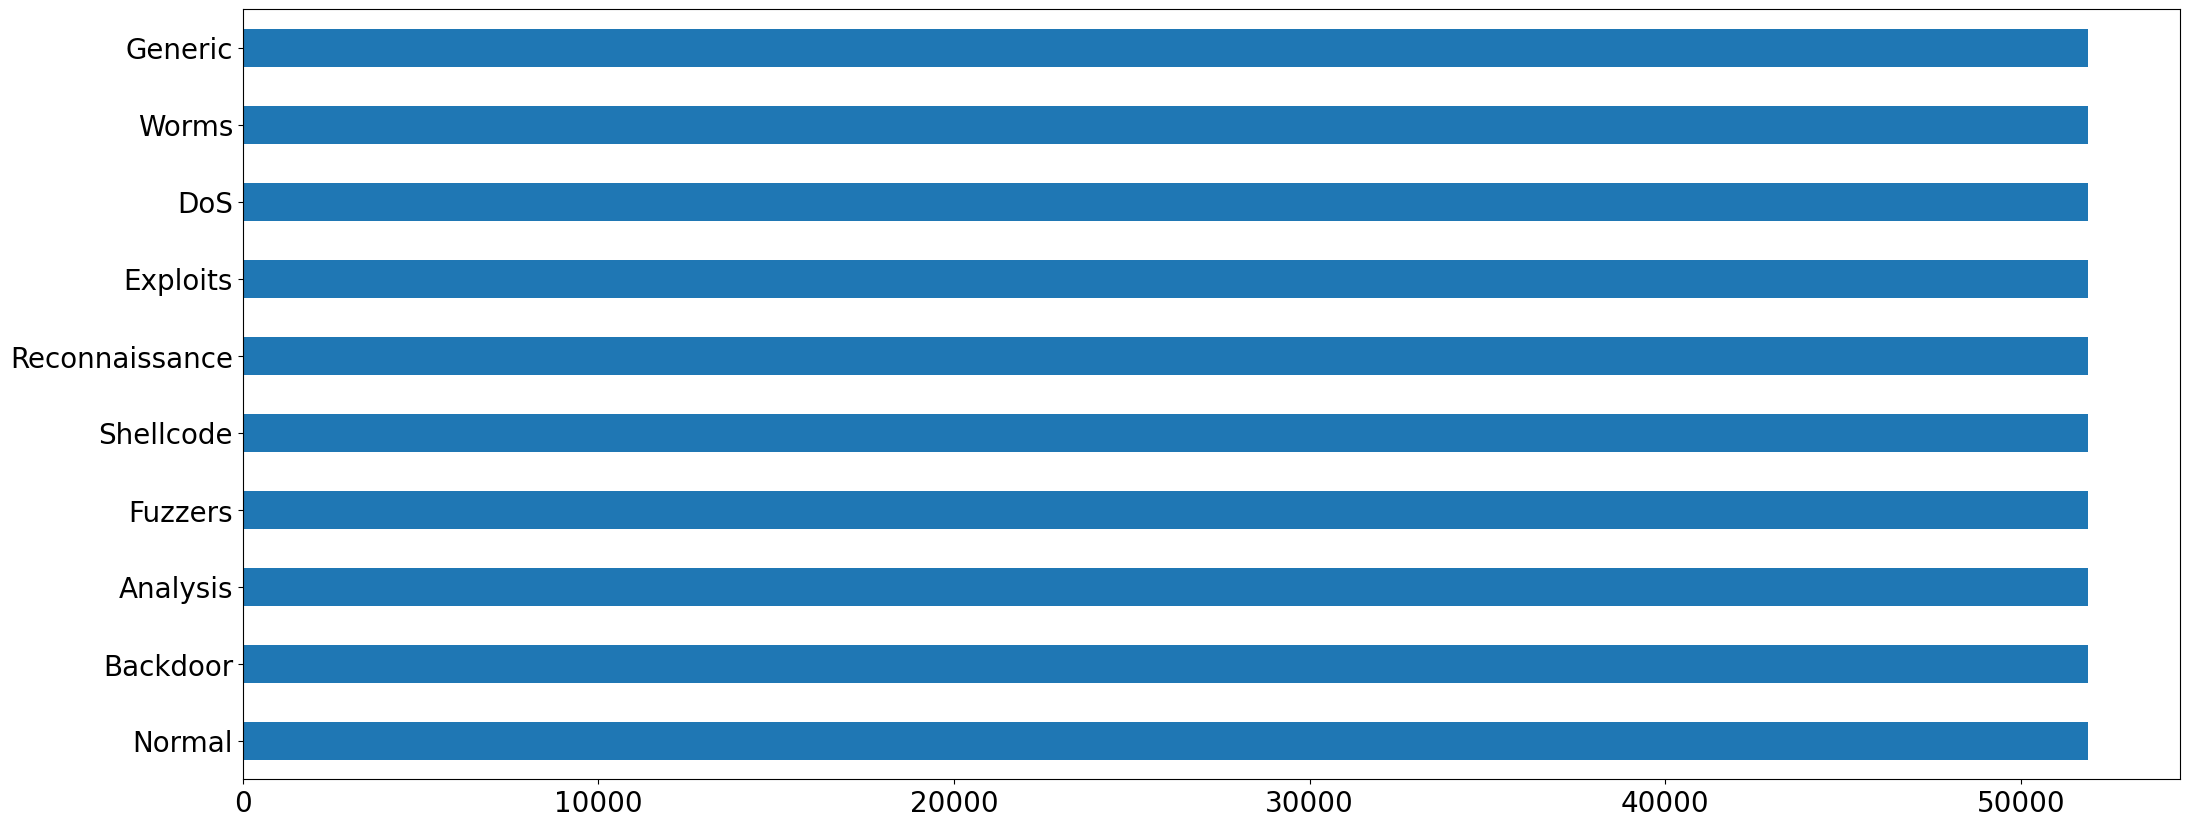

In [50]:
train_attack_types_os = train_Y_os.value_counts()
train_attack_types_os.plot(kind='barh', figsize=(25,10), fontsize=20)

In [54]:
for cls, name in classifiers: 
    pipe = Pipeline([("MinMaxScaler", MinMaxScaler()), (name, cls)])
    pipe.fit(train_x_os, train_Y_os)
    predicted_os = pipe.predict(test_x)

    print(name)
    print("Precision: %f" % precision_score(test_Y, predicted_os, average="weighted", zero_division=0))
    print("Recall: %f" % recall_score(test_Y, predicted_os, average="weighted"))
    print("F1-Score: %f" % f1_score(test_Y, predicted_os, average="weighted"))
    print()

/home/luca/miniconda3/envs/lab/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Precision: 0.764751
Recall: 0.558216
F1-Score: 0.617068

SVC
Precision: 0.770343
Recall: 0.572390
F1-Score: 0.620317

Decision Tree
Precision: 0.815385
Recall: 0.699910
F1-Score: 0.742998

